Open logistic_regression.ipynb. In the first cell, Matplotlib and Pandas libraries are imported. In the second cell, a synthetic dataset is generated with Scikit-learn’s make_blobs module. You do not need to focus on the details; the sole purpose here is to create two clusters of data named X and y:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


The centers argument specifies the number of clusters in the dataset; in this case there are two clusters. The random_state ensures reproducibility of this dataset: even though the numbers in this dataset are generated pseudo-randomly, specifying 42 as the random_state argument will generate the identical dataset in the future.

Notice also that the dataset is split into X and y arrays. X contains the coordinates of each data point, and y contains information on the class of each data point. That is, each point belongs to either class 0 or 1. Purple dots belong to class 0, while yellow dots belong to class 1. The term “labels” is used here as a synonym for target variable.

In the next cell, the dataset is visualized. We see a scatter plot with two clearly separated groups of data points. The data points to the left of 0 on the x-axis are purple, while those to its right are colored yellow. The logistic regression model will be trained on this data, and it will be able to categorize a new data point as one of the two classes (yellow or purple):

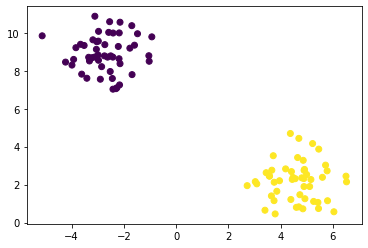

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

## Split the Dataset Into Train and Test Sets

In the next cell, we split the dataset into two: train and test datasets. Imagine that you are studying for a major exam and have a test bank of 100 questions available. A good strategy might be to use 75 of the questions as you study for the exam. These questions will help pinpoint important topics and patterns of information you might encounter on the actual exam.

Then, a few days before the exam, you sit down to answer the remaining 25 questions in a mock test. Since you haven’t seen these questions before, how well you perform on them will give you a good idea of how you will do on the actual exam.

Similarly, a dataset is split into training and testing sets in supervised learning. The model uses the training dataset to learn from it. It then uses the testing dataset to assess its performance. If you use your entire dataset to train the model, you won’t know how well the model will perform when it encounters unseen data. That is why it’s important to set aside a portion of your dataset to evaluate your model.

In the next cell, the dataset is split into training and testing sets:

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

Recall that X is the input, and y is the output, or what we wish to predict. Scikit-learn’s train_test_split module takes X and y as arguments and splits each into training and test sets. So in all, we end up with four sets. X is split into X_train and X_test sets, and y is split into y_train and y_test sets.

The train_test_split() function has four arguments here. The first two, as discussed, are X and y, which are split into train and test sets. We saw previously that random_state is used to make the data reproducible. Specifying a random state of 1 ensures that the same rows are assigned to train and test sets, respectively. A different random state number would distribute different rows of data to the train and test sets. Note that the random_state argument is used here only for pedagogical purposes, so that you will obtain the same results shown here when you run the notebook. You will not need to use it when you create your own analyses.

The last argument, stratify, also deserves discussion. Stratifying a dataset divides it proportionally. For example, say that 60% of a dataset belongs to the yellow class, and 40% of it belongs to the purple class. Stratifying it ensures that when the entire dataset is split into training and testing sets, 60% of both will belong to the yellow class, and 40% will belong to the purple class. Without specifying stratification, samples will be assigned randomly, so that it is possible to end up with a training set with a 68-32 split and a testing set with a 65-35 split, for example:

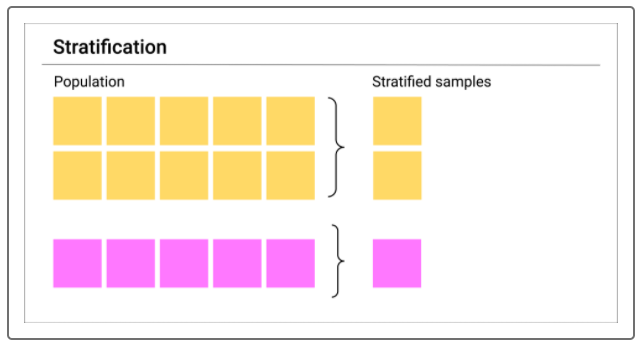

However, imagine a scenario in which one class is significantly larger than the other. For example, let’s say that we’re analyzing 10,000 credit card transactions, and only 40 of them are flagged as fraudulent. We might allocate 75% of the dataset to the training set, and 25% to the testing set, so we’d expect the training set to contain 75% of the fraudulent transactions (30), and the testing set to contain 25% of the fraudulent transactions (10). Without stratification, it’s possible for the fraudulent transactions to be distributed disproportionately—for example, 20 to the training set and 20 to the testing set. And as the model trains on the unrepresentative data, it can reach wrong conclusions. It’s therefore important to consider stratifying the data, especially when the classes are severely unbalanced, or when the dataset is small.


In [7]:
#Instantiate a Logistic Regression Model In the next cell, we create a logistic regression model:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [16]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   intercept_scaling=1, 11_ratio=None, max_iter=100,
   multi_class='warn', n_jobs=None, penalty='12',
   random_state=1, solver='lbfgs' tol=0.0001, verbose=0,
   warm_start=False)


SyntaxError: invalid token (<ipython-input-16-a4b238244f65>, line 2)

Let’s break down this code:
- We first import LogisticRegression from the Scikit-learn library, and then instantiate the model.
- The solver argument is set to 'lbfgs', which is an algorithm for learning and optimization. The particular solver isn’t very important in this example, but note that a number of optimizers exist.
- Once again, the random_state is specified so that you’ll be able to reproduce the same results as you run this notebook.

## Train the Logistic Regression Model

The next step is to train the model with the training set data. We use the fit() method to train the model:

In [10]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

## Validate the Logistic Regression Model
The next step is to create predictions and assemble the results into a Pandas DataFrame:

In [11]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


Let’s break down this code:

- The first line of code uses the predict() method to create predictions based on X_test.
- The second line creates a DataFrame of predicted values and actual values.

Next, we validate the model, or evaluate its performance. You can create a model and use it to make predictions, but you won’t know how good the model is unless you assess its performance:

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

The model achieved an accuracy score of 1.0. This means that every single observation in the testing set was predicted correctly by the model. All samples belonging to class 1 (yellow) were correctly predicted, and all samples belonging to class 0 (purple) were likewise correctly predicted by the model. Although perfect accuracy was achieved in this example, it is rare in actual practice. Moreover, an extremely high metric should raise your suspicion of overfitting. Overfitting refers to an instance in which the patterns picked up by a model are too specific to a specific dataset. We will discuss overfitting in greater detail later in the module.

The sole purpose of the next cell is to create a new data point, which shows up as a red dot on the new plot. The logistic regression model will then classify this sample as belonging to class 0 (purple) or class 1 (yellow):

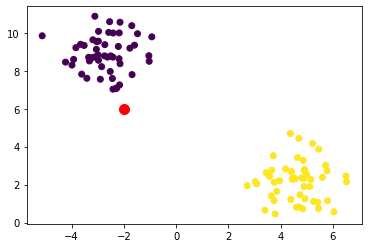

In [13]:
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)
plt.show()

Once again, we use predict() to predict which class the new data point belongs to. It turns out, as expected, that the red dot belongs to the purple cluster:

In [14]:
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]


Let’s summarize the steps we took to use a logistic regression model:

1. Create a model with LogisticRegression().
2. Train the model with model.fit().
3. Make predictions with model.predict().
4. Validate the model with accuracy_score().

# Logistic Regression to Predict Diabetes

Open diabetes.ipynb. We can see from the preview of the DataFrame that multiple variables (also called features), such as the number of previous pregnancies, blood glucose level, and age, can be used to predict the outcome: whether a person has diabetes (1) or does not have diabetes (0):

In [43]:
import os
%cd c:\Users\otrin\onedrive\Desktop\Git\machine_learning
os.getcwd()

c:\Users\otrin\onedrive\Desktop\Git\machine_learning


'c:\\Users\\otrin\\onedrive\\Desktop\\Git\\machine_learning'

In [47]:
df = pd.read_csv("Resources\diabetes.csv")

In [48]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


A common task in machine learning is data preparation. In previous examples, we assigned the label X to input variables, and used them to predict y, or the output. With this diabetes dataset, we need to categorize features from the target. We can do so by separating the Outcome column from the other columns.

NOTE
The terms features and variables are synonymous. Target and output are synonymous.

In [49]:
y = df["Outcome"]
X = df.drop(columns="Outcome")

- The Outcome column is defined as y, or the target.
- X, or features, is created by dropping the Outcome column from the DataFrame.
Later in this module, we’ll be splitting the training and testing data, creating a logistic regression model, fitting the training data, and making a prediction. What steps can you do on your own in the following Skill Drills?

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=1, stratify=y)

In [58]:
#Instantiate a Logistic Regression Model In the next cell, we create a logistic regression model:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=200,
   random_state=1)

In [59]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [66]:
# To create predictions for y-values, we used the X_test set:
y_pred = classifier.predict(X_test)

In [68]:
# Compare actual vs predicted values
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7760416666666666
